In [2]:
import numpy as np
import pandas as pd

raw = pd.read_csv('/content/Placement_Data_Full_Class.csv')
raw.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
raw.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

# Categorical Values

Identify the Unique values in all the Categorical columns in the data.

In [5]:
for i in raw.select_dtypes(include='object'):
    print(f"Unique Values in {i} : {raw[i].unique()}")

Unique Values in gender : ['M' 'F']
Unique Values in ssc_b : ['Others' 'Central']
Unique Values in hsc_b : ['Others' 'Central']
Unique Values in hsc_s : ['Commerce' 'Science' 'Arts']
Unique Values in degree_t : ['Sci&Tech' 'Comm&Mgmt' 'Others']
Unique Values in workex : ['No' 'Yes']
Unique Values in specialisation : ['Mkt&HR' 'Mkt&Fin']
Unique Values in status : ['Placed' 'Not Placed']


Group by Categorical columns and get the count of each value.

In [6]:
for i in raw.select_dtypes(include='object'):
    print(raw[i].value_counts())
    print("*********************")

M    139
F     76
Name: gender, dtype: int64
*********************
Central    116
Others      99
Name: ssc_b, dtype: int64
*********************
Others     131
Central     84
Name: hsc_b, dtype: int64
*********************
Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64
*********************
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64
*********************
No     141
Yes     74
Name: workex, dtype: int64
*********************
Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64
*********************
Placed        148
Not Placed     67
Name: status, dtype: int64
*********************


# Graphical representation Count of each Categorical columns and its unique values.

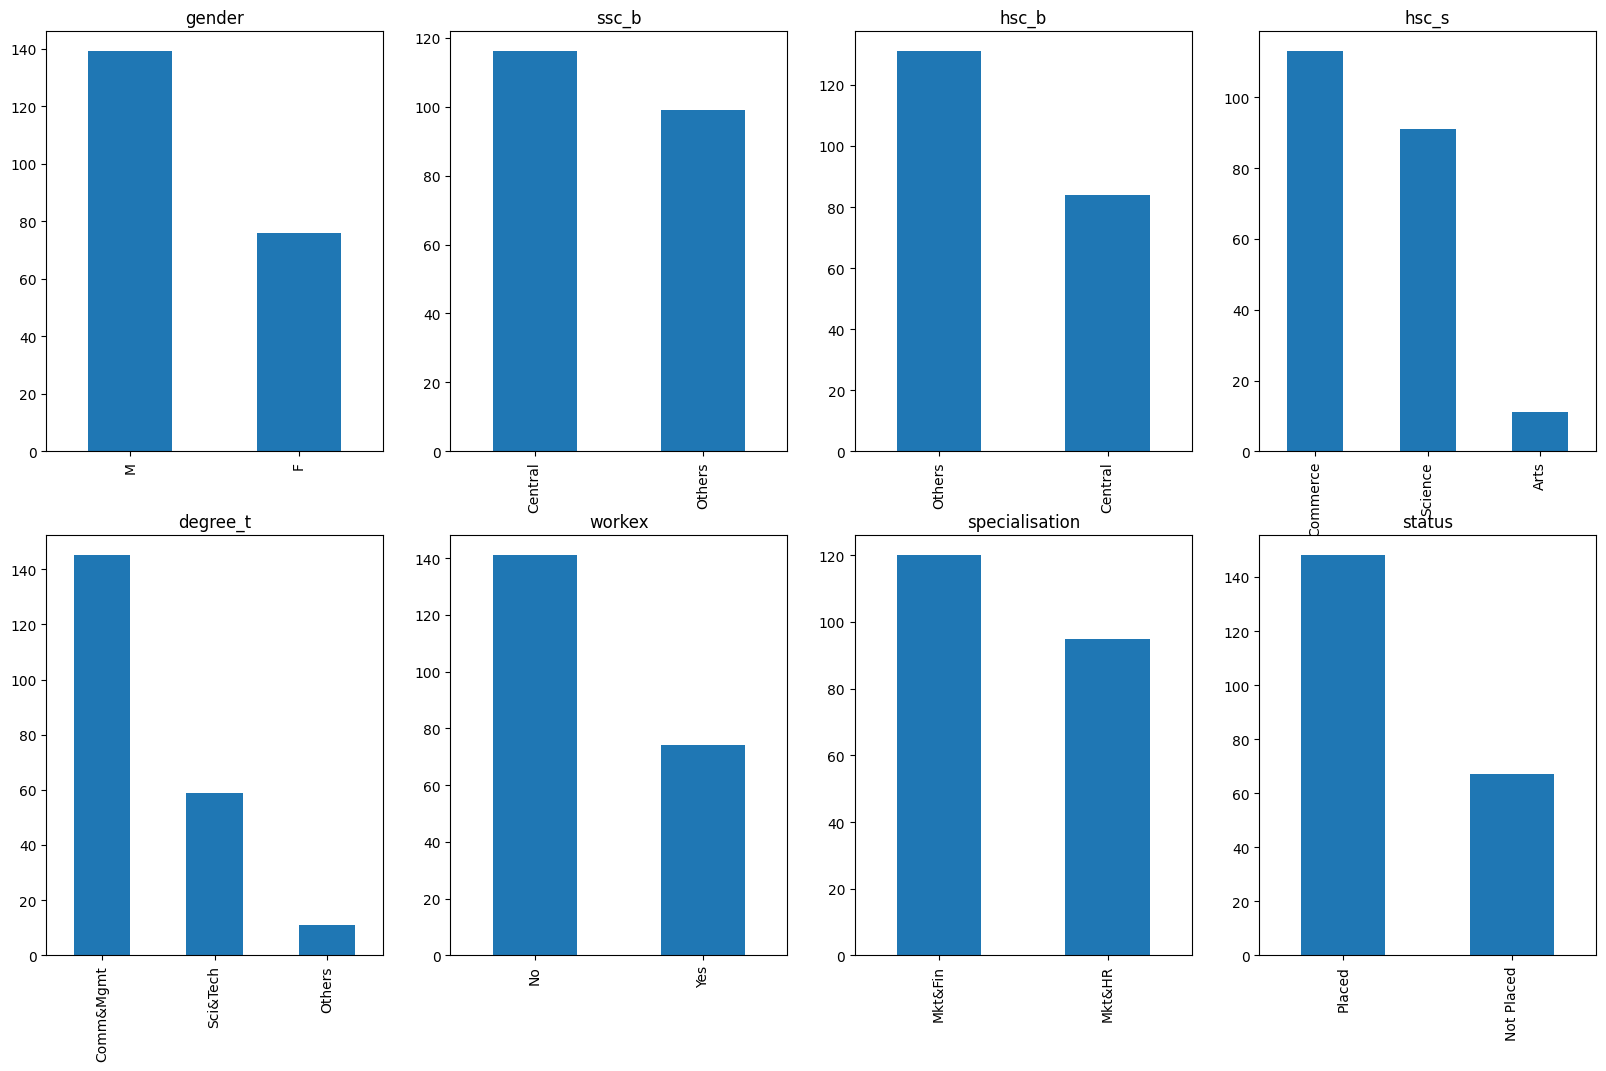

In [7]:
import matplotlib.pyplot as plt

# assuming you have 12 columns:
fig,axes = plt.subplots(nrows=2, ncols=4, figsize=(20,12))

for col, ax in zip(raw.select_dtypes(include='object'), axes.ravel()):
    raw[col].value_counts().plot.bar(ax=ax).set_title(col)

plt.show()

# Relation between each categorical columns and "Status" column.
It gives information of for each categorical values how many are Placed and how many are Not Placed.

In [8]:
for i in raw.select_dtypes(include='object'):
    print(pd.crosstab(index = raw[i], columns = raw['status']))
    print("####################################")

status  Not Placed  Placed
gender                    
F               28      48
M               39     100
####################################
status   Not Placed  Placed
ssc_b                      
Central          38      78
Others           29      70
####################################
status   Not Placed  Placed
hsc_b                      
Central          27      57
Others           40      91
####################################
status    Not Placed  Placed
hsc_s                       
Arts               5       6
Commerce          34      79
Science           28      63
####################################
status     Not Placed  Placed
degree_t                     
Comm&Mgmt          43     102
Others              6       5
Sci&Tech           18      41
####################################
status  Not Placed  Placed
workex                    
No              57      84
Yes             10      64
####################################
status          Not Placed  Placed
speciali

# Graphical representation of relation between each Categorical columns and "Status" column.

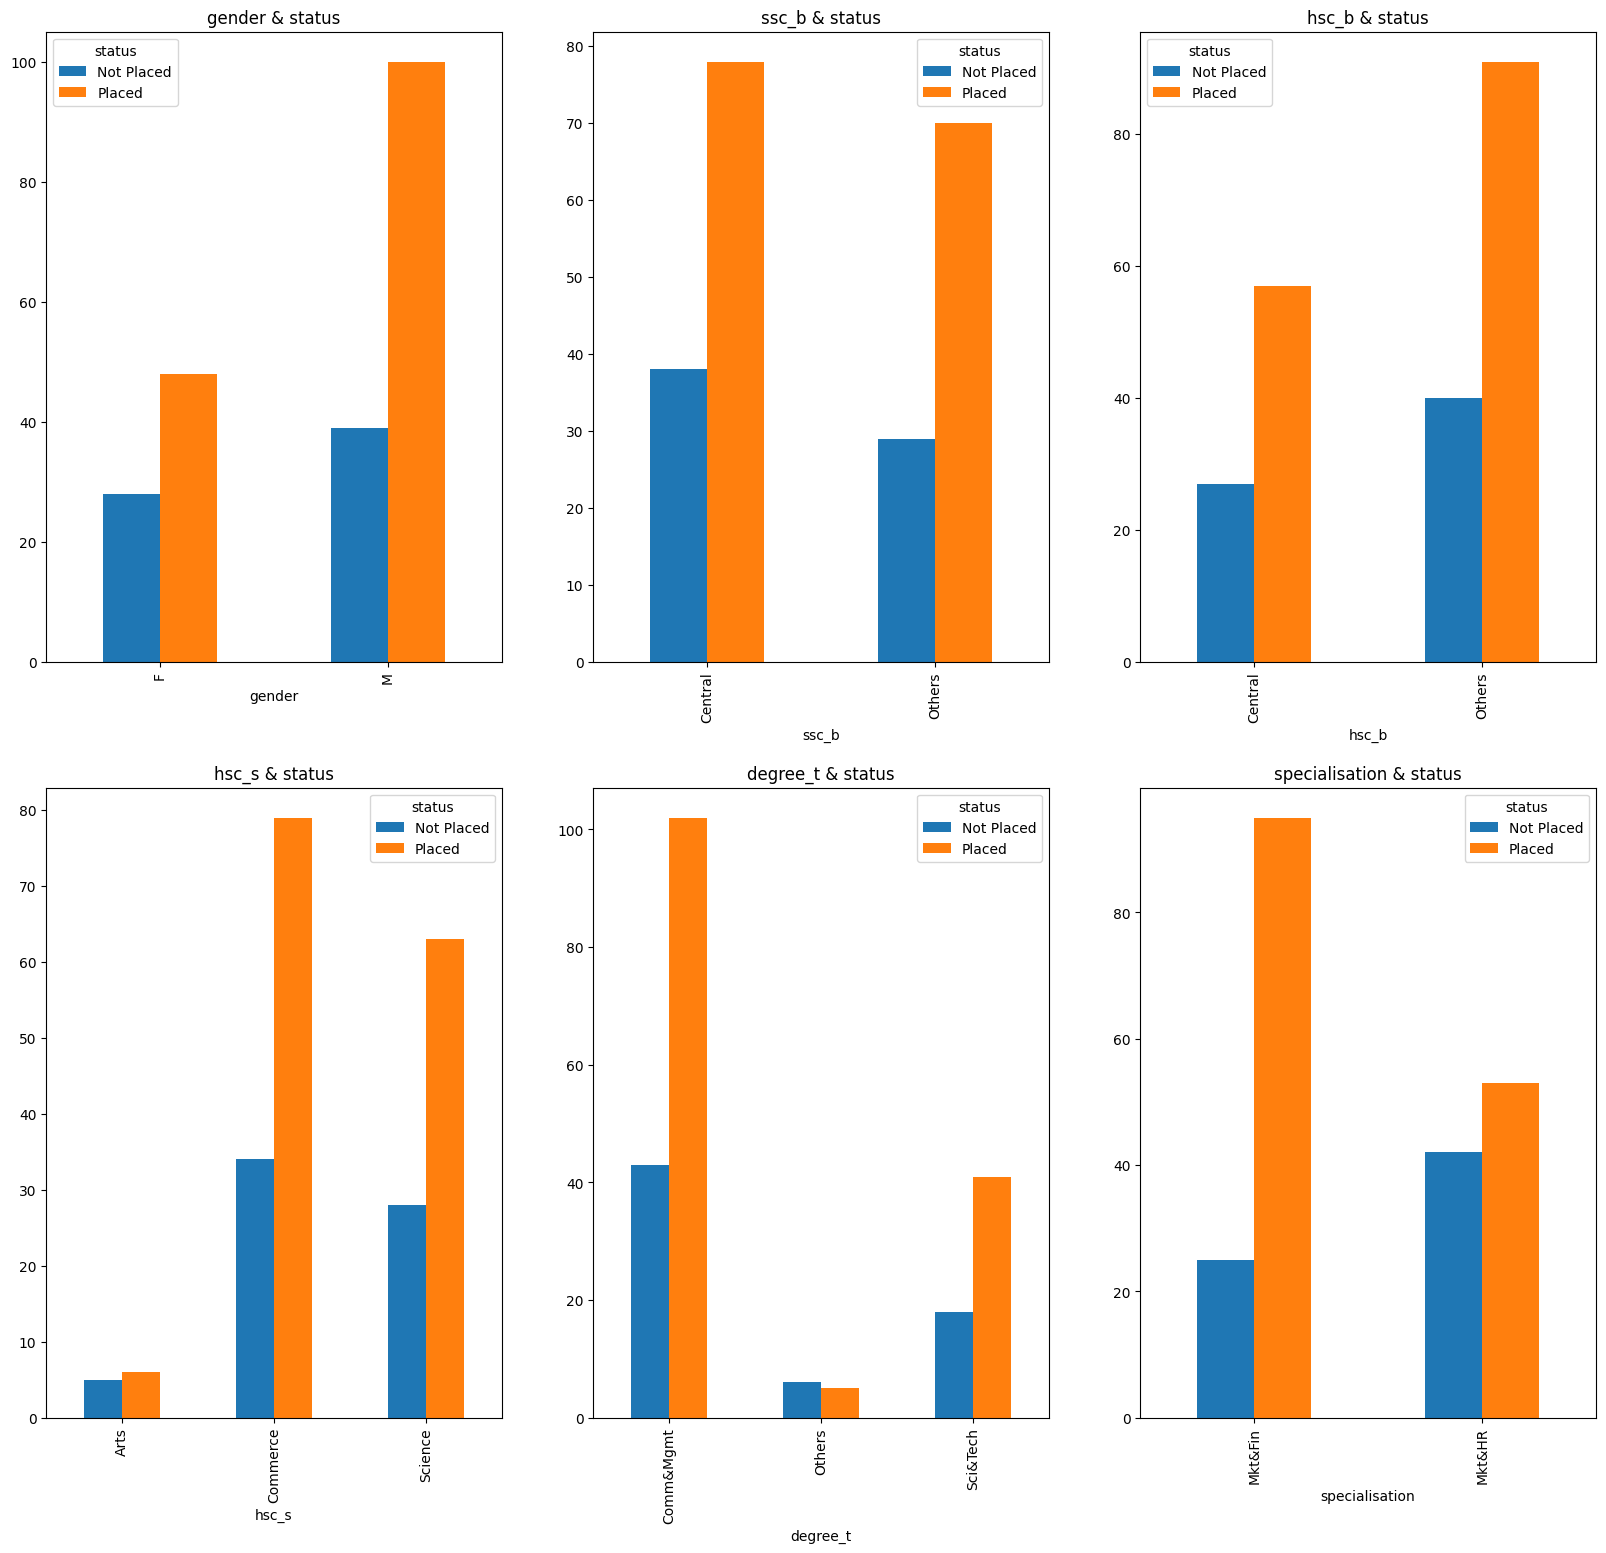

In [9]:
ffig,axes = plt.subplots(nrows=2, ncols=3, figsize=(20,18))

cat_cols = raw[['gender','ssc_b','hsc_b','hsc_s','degree_t','specialisation']]
for col, ax in zip(cat_cols, axes.ravel()):
    pd.crosstab(index = raw[col],columns = raw['status']).plot.bar(ax=ax).set_title(col+' & status')

plt.show()

# Fill NaN values in the "Salary" column in the Data.

In [10]:
raw['salary'].describe()

count       148.000000
mean     288655.405405
std       93457.452420
min      200000.000000
25%      240000.000000
50%      265000.000000
75%      300000.000000
max      940000.000000
Name: salary, dtype: float64

<Axes: >

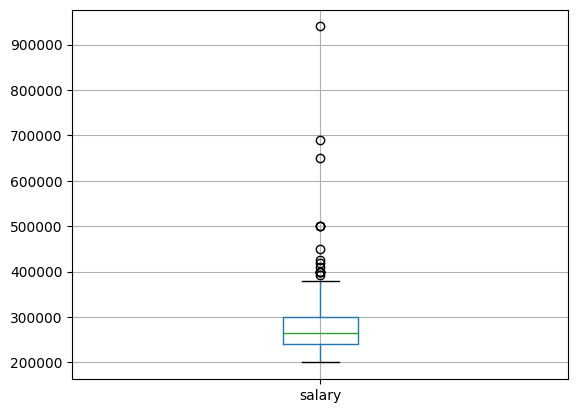

In [11]:
raw.boxplot(column='salary')

In [12]:
print(f"Mode of Salary : {raw['salary'].mode()}")

Mode of Salary : 0    300000.0
Name: salary, dtype: float64


In [13]:
len(raw[raw["salary"] == 300000.0].index)

22

In [14]:
raw['salary'] = raw['salary'].fillna(raw['salary'].median())

Since, we have many outliers in the "Salary" column of the existing data. Hence, we can't replace NaN values with Mean. If we take the Mode to replace the NaN values then there will be about 90 transactions out of 215 with salary as "300000.0". Hence replaced NaN values with Median.

In [15]:
raw['salary'].unique()

array([270000., 200000., 250000., 265000., 425000., 252000., 231000.,
       260000., 218000., 300000., 236000., 393000., 360000., 240000.,
       350000., 278000., 320000., 411000., 287000., 204000., 450000.,
       216000., 220000., 268000., 275000., 336000., 230000., 500000.,
       400000., 210000., 420000., 380000., 280000., 276000., 940000.,
       225000., 233000., 690000., 340000., 255000., 285000., 290000.,
       650000., 264000., 295000.])

In [16]:
raw.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

Removing 'Sl_no' column from the Data set as it is not useful for the Prediction.

Removing "hsc_b" column which represents hsc board which Central or Others. We will retain the "hsc_s" which gives info of hsc specialization.

Hence, we can use "hsc_s" column for prediction.

In [17]:
mod_data = raw.copy()
mod_data.drop(['sl_no','hsc_b'], axis = 1, inplace = True)
mod_data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,265000.0
4,M,85.80,Central,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Corelation Matrix for all the Numeric columns.

<Axes: >

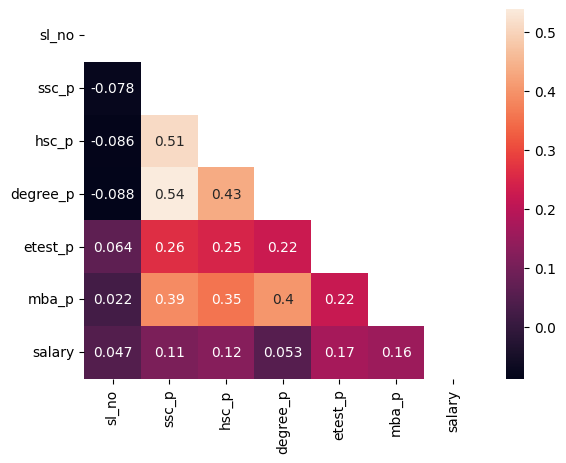

In [18]:
import seaborn as sns
import numpy as np

corr = raw.select_dtypes(exclude = 'object').corr()
sns.heatmap(corr, mask=np.triu(corr), annot=True)

# Encode all the categorical column values using the Label Encoding.

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_cols = list(mod_data.select_dtypes(include="object").columns)
cat_cols
for col in cat_cols:
    mod_data[col] = le.fit_transform(mod_data[col])

# Apply Min Max scaler for all the columns with "int64" data type in the data.

In [20]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = mod_data.iloc[:,:11]
Y = mod_data.iloc[:,-2]

X_Data = ms.fit_transform(X)
X_Data

array([[1.        , 0.53823954, 1.        , ..., 0.10416667, 1.        ,
        0.28448276],
       [1.        , 0.79241394, 0.        , ..., 0.76041667, 0.        ,
        0.56484258],
       [1.        , 0.49701093, 0.        , ..., 0.52083333, 0.        ,
        0.2470015 ],
       ...,
       [1.        , 0.53823954, 1.        , ..., 0.1875    , 0.        ,
        0.69377811],
       [0.        , 0.68253968, 1.        , ..., 0.41666667, 1.        ,
        0.33808096],
       [1.        , 0.43516801, 0.        , ..., 0.8125    , 1.        ,
        0.33770615]])

In [21]:
X_Data.shape

(215, 11)

In [22]:
Y.shape

(215,)

# Split the Data in to Train & Test Data.

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_Data,Y,test_size=0.2,random_state=1, stratify=Y)

In [24]:
x_train.shape, x_test.shape

((172, 11), (43, 11))

# Logistic Regression:

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [26]:
y_pred = lr.predict(x_test)

In [27]:
from sklearn import metrics

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.85      0.97      0.91        30

    accuracy                           0.86        43
   macro avg       0.87      0.79      0.82        43
weighted avg       0.86      0.86      0.85        43



# Random Forest:

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
t_rf_pred = rf.predict(x_test)

In [29]:
print(metrics.classification_report(y_test,t_rf_pred))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.88      0.93      0.90        30

    accuracy                           0.86        43
   macro avg       0.85      0.81      0.83        43
weighted avg       0.86      0.86      0.86        43



# Decision Tree:

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_dt_pred = dt.predict(x_test)

In [31]:
print(metrics.classification_report(y_test,y_dt_pred))

              precision    recall  f1-score   support

           0       0.54      0.54      0.54        13
           1       0.80      0.80      0.80        30

    accuracy                           0.72        43
   macro avg       0.67      0.67      0.67        43
weighted avg       0.72      0.72      0.72        43



# Support Vector Machine:

In [32]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(x_train,y_train)
y_svc_pred = sv.predict(x_test)

In [33]:
print(metrics.classification_report(y_test,y_svc_pred))

              precision    recall  f1-score   support

           0       0.88      0.54      0.67        13
           1       0.83      0.97      0.89        30

    accuracy                           0.84        43
   macro avg       0.85      0.75      0.78        43
weighted avg       0.84      0.84      0.82        43



# XGBOOST Classifier:

In [34]:
import xgboost

xgb = xgboost.XGBClassifier()
xgb.fit(x_train,y_train)
y_xgb_pred = xgb.predict(x_test)

In [35]:
print(metrics.classification_report(y_test,y_xgb_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.90      0.93      0.92        30

    accuracy                           0.88        43
   macro avg       0.87      0.85      0.86        43
weighted avg       0.88      0.88      0.88        43



# Naive Bayes:

In [36]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_gnb_pred = gnb.predict(x_test)

In [37]:
print(metrics.classification_report(y_test,y_gnb_pred))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76        13
           1       0.93      0.83      0.88        30

    accuracy                           0.84        43
   macro avg       0.81      0.84      0.82        43
weighted avg       0.85      0.84      0.84        43



# AdaBoost Classifier:

In [38]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
y_abc_pred = abc.predict(x_test)

In [39]:
print(metrics.classification_report(y_test,y_abc_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.90      0.90      0.90        30

    accuracy                           0.86        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.86      0.86      0.86        43



# Gradient Boost Classifier:

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_gbc_pred = gbc.predict(x_test)

In [41]:
print(metrics.classification_report(y_test,y_gbc_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.94      0.97      0.95        30

    accuracy                           0.93        43
   macro avg       0.93      0.91      0.92        43
weighted avg       0.93      0.93      0.93        43



1 is Placed and 0 is Not Placed

In [42]:
%pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 12.1 MB/s eta 0:00:00


# Hyperparameter Tuning on Gradient Boosting Classifier Model with Optuna (Automated Search)

In [45]:
import optuna
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [46]:
import time
def objective(trial):
    # Defining the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
    max_depth = trial.suggest_int('max_depth', 3, 5)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 4)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 3)

    # Creating a GradientBoostingClassifier with the suggested hyperparameters
    cl = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Fit the model on the training data
    cl.fit(x_train, y_train)

    # Predictions on the test data
    y_pred = cl.predict(x_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Creating a Optuna study and optimizing it
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Best parameters from the study
best_params = study.best_params

# Fit the classifier with the best parameters on the training data
best_cl = GradientBoostingClassifier(**best_params, random_state=42)
start_time = time.time()
best_cl.fit(x_train, y_train)
gb_training_time = time.time() - start_time

# Predictions on the test data
y_pred = best_cl.predict(x_test)

[I 2023-08-28 10:52:59,024] A new study created in memory with name: no-name-c19bd57d-773a-4e50-810d-15933014efb3
[I 2023-08-28 10:52:59,127] Trial 0 finished with value: 0.8604651162790697 and parameters: {'n_estimators': 108, 'learning_rate': 0.13921716912484183, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.8604651162790697.
[I 2023-08-28 10:52:59,213] Trial 1 finished with value: 0.8604651162790697 and parameters: {'n_estimators': 117, 'learning_rate': 0.0837592956072064, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8604651162790697.
[I 2023-08-28 10:52:59,396] Trial 2 finished with value: 0.8372093023255814 and parameters: {'n_estimators': 178, 'learning_rate': 0.12190448867065687, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.8604651162790697.
[I 2023-08-28 10:52:59,473] Trial 3 finished with value: 0.8372093023255814 and parameters: {'n

 Accuracy of Gradient Boosting Classifier Model with Optuna (Automated Search)

In [47]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

Best Model Accuracy: 0.9534883720930233


 Classification report

In [48]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)
print("Best Model Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.94      1.00      0.97        30

    accuracy                           0.95        43
   macro avg       0.97      0.92      0.94        43
weighted avg       0.96      0.95      0.95        43

Best Model Accuracy: 0.9534883720930233


In [49]:
from sklearn.model_selection import cross_val_score
num_folds = 5
scores_gb = cross_val_score(best_cl, x_train, y_train, cv=num_folds)
mean_accuracy_gb = scores_gb.mean()
print("Mean Accuracy (Gradient Boosting):", mean_accuracy_gb)
print("Training Time (Gradient Boosting):", gb_training_time, "seconds")



Mean Accuracy (Gradient Boosting): 0.854453781512605
Training Time (Gradient Boosting): 0.11720633506774902 seconds


# Visualization of the feature importance scores

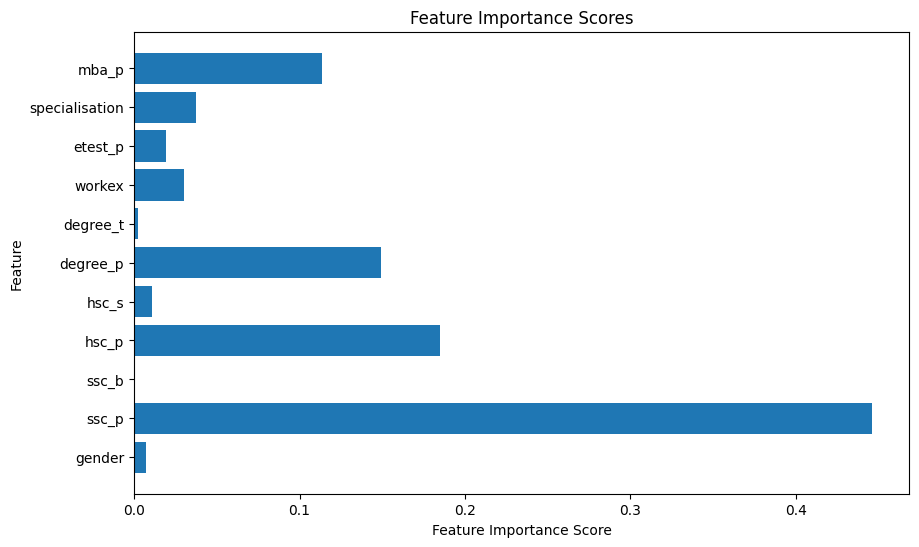

In [50]:
feature_importances = best_cl.feature_importances_

# Getting Feature names from the dataset
feature_names = list(X.columns)

# Creating a bar chart to visualize feature importance scores
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), feature_names)
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance Scores')
plt.show()

# Top N most important features along with their importance scores.

In [77]:
# Creating a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sorting the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N most important features
top_n = 11
print(f"Top {top_n} most important features:")
print(feature_importance_df.head(top_n))

Top 11 most important features:
           Feature  Importance
1            ssc_p    0.446026
3            hsc_p    0.184680
5         degree_p    0.149053
10           mba_p    0.113478
9   specialisation    0.037416
7           workex    0.029913
8          etest_p    0.019029
4            hsc_s    0.010713
0           gender    0.007191
6         degree_t    0.002286
2            ssc_b    0.000214


# Analysis of key areas for improvement based on the top features.

In [78]:
top_features = feature_importance_df.head(top_n)

for feature, importance in zip(top_features['Feature'], top_features['Importance']):
    print("\n" + "-" * 40)
    print(f"Analyzing feature: {feature}")

    if importance > 0.05:  # You can adjust the threshold based on your needs
        print(f"{feature} has a positive impact on placement outcomes.")
        print("Higher values of", feature, "correlate with better placement outcomes.")

    elif importance < -0.05:  # You can adjust the threshold based on your needs
        print(f"{feature} has a negative impact on placement outcomes.")
        print("Higher values of", feature, "correlate with poorer placement outcomes.")

    else:
        print(f"{feature} has a relatively neutral impact on placement outcomes.")
        print(f"{feature} may not have a significant influence on placement outcomes.")



----------------------------------------
Analyzing feature: ssc_p
ssc_p has a positive impact on placement outcomes.
Higher values of ssc_p correlate with better placement outcomes.

----------------------------------------
Analyzing feature: hsc_p
hsc_p has a positive impact on placement outcomes.
Higher values of hsc_p correlate with better placement outcomes.

----------------------------------------
Analyzing feature: degree_p
degree_p has a positive impact on placement outcomes.
Higher values of degree_p correlate with better placement outcomes.

----------------------------------------
Analyzing feature: mba_p
mba_p has a positive impact on placement outcomes.
Higher values of mba_p correlate with better placement outcomes.

----------------------------------------
Analyzing feature: specialisation
specialisation has a relatively neutral impact on placement outcomes.
specialisation may not have a significant influence on placement outcomes.

-------------------------------------

# Interpretations based on the analysis of the feature importance scores

## Positive Impact Features:

Higher values in ssc_p, hsc_p, degree_p, and mba_p are associated with better placement outcomes.

Encouraging students to excel in these academic aspects can enhance their chances of successful placements.

## Relatively Neutral Impact Features:

Specialisation, workex, etest_p, hsc_s, gender, and degree_t show neutral influence on placement outcomes.

While not strongly linked to placement success, these factors contribute to the overall student profile. Provided with good career guidance, internships, and inclusive campus activities can improve overall employability.

# Hyperparameter Tuning on Ada Boost Classifier Model with Optuna (Automated Search)

In [53]:
def objective(trial):
    # Defining the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)

    # Creation of an AdaBoostClassifier with the suggested hyperparameters
    clf = AdaBoostClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=42
    )

    # Fit the model on the training data
    clf.fit(x_train, y_train)

    # Predictions on the test data
    y_pred = clf.predict(x_test)

    #Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Creating an Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

#Best parameters from the study
best_params = study.best_params

# Fit the classifier with the best parameters on the training data
best_clf = AdaBoostClassifier(**best_params, random_state=42)
start_time = time.time()
best_clf.fit(x_train, y_train)
ada_training_time = time.time() - start_time

#Predictions on the test data
y_pred = best_clf.predict(x_test)



[I 2023-08-28 10:53:12,453] A new study created in memory with name: no-name-b5ed253d-0a20-40ad-ab6e-a0eb606bbf9e
[I 2023-08-28 10:53:12,558] Trial 0 finished with value: 0.8837209302325582 and parameters: {'n_estimators': 85, 'learning_rate': 0.03649401930545924}. Best is trial 0 with value: 0.8837209302325582.
[I 2023-08-28 10:53:12,677] Trial 1 finished with value: 0.9069767441860465 and parameters: {'n_estimators': 88, 'learning_rate': 0.10343080655363267}. Best is trial 1 with value: 0.9069767441860465.
[I 2023-08-28 10:53:12,843] Trial 2 finished with value: 0.9534883720930233 and parameters: {'n_estimators': 129, 'learning_rate': 0.12659895427589116}. Best is trial 2 with value: 0.9534883720930233.
[I 2023-08-28 10:53:12,948] Trial 3 finished with value: 0.9069767441860465 and parameters: {'n_estimators': 79, 'learning_rate': 0.10305346577689027}. Best is trial 2 with value: 0.9534883720930233.
[I 2023-08-28 10:53:13,104] Trial 4 finished with value: 0.9534883720930233 and param

Accuracy and Classification Report of Ada Boost Classifier Model with Optuna (Automated Search)

In [54]:

accuracy = accuracy_score(y_test, y_pred)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)
print("Best Model Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.94      1.00      0.97        30

    accuracy                           0.95        43
   macro avg       0.97      0.92      0.94        43
weighted avg       0.96      0.95      0.95        43

Best Model Accuracy: 0.9534883720930233


In [55]:
from sklearn.model_selection import cross_val_score
num_folds = 5
scores_gb = cross_val_score(best_clf, x_train, y_train, cv=num_folds)
mean_accuracy_gb = scores_gb.mean()
print("Mean Accuracy (AdaBoost):", mean_accuracy_gb)
print("Training Time (AdaBoost):", ada_training_time, "seconds")

Mean Accuracy (AdaBoost): 0.8425210084033614
Training Time (AdaBoost): 0.19284749031066895 seconds


# Performance of AdaBoost over iterations

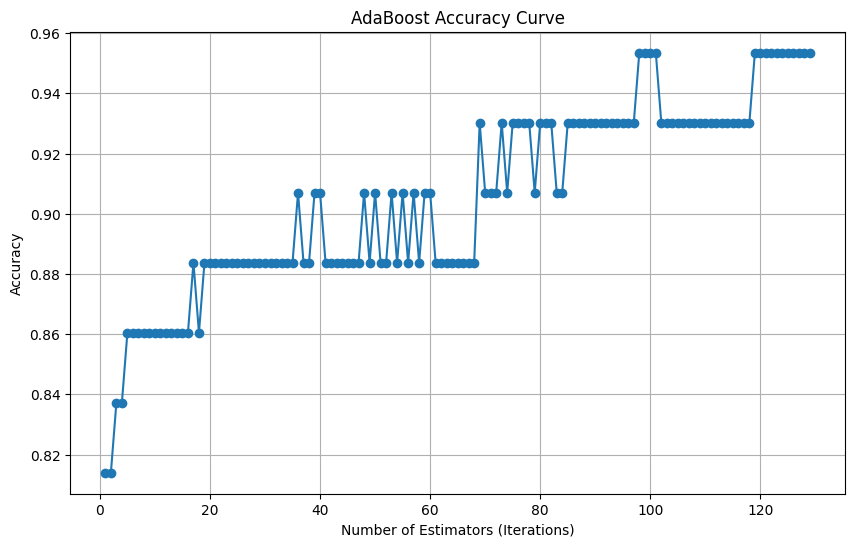

In [59]:
# Manually calculate accuracy at each iteration
n_iterations = len(best_clf.estimators_)
accuracies = []
for i, y_pred in enumerate(best_clf.staged_predict(x_test)):
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, n_iterations + 1), accuracies, marker='o')
plt.xlabel("Number of Estimators (Iterations)")
plt.ylabel("Accuracy")
plt.title("AdaBoost Accuracy Curve")
plt.grid(True)
plt.show()

## Precision-Recall relationship

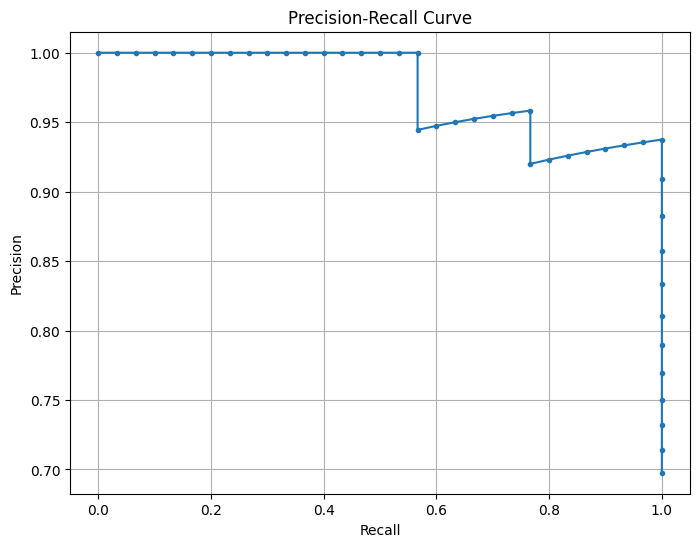

In [65]:
from sklearn.metrics import precision_recall_curve


# Assuming best_clf is your trained AdaBoostClassifier
y_scores = best_clf.predict_proba(x_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

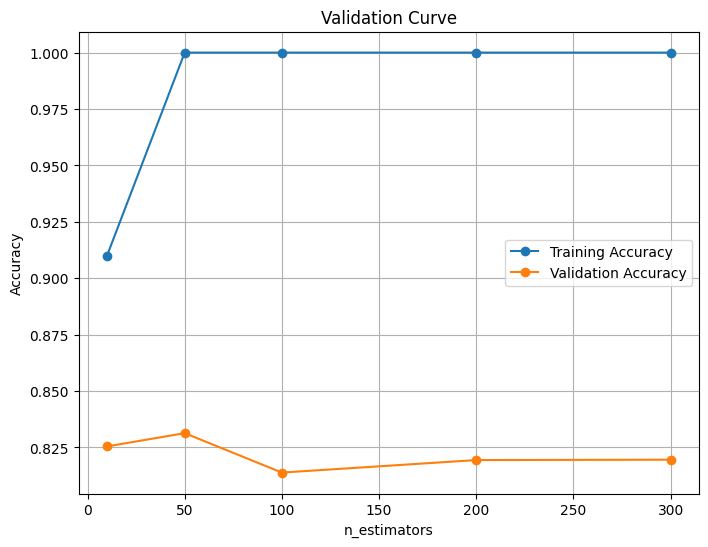

In [66]:
from sklearn.model_selection import validation_curve

param_name = 'n_estimators'  # Choose a hyperparameter to vary
param_range = [10, 50, 100, 200, 300]  # Vary the hyperparameter values

train_scores, test_scores = validation_curve(
    AdaBoostClassifier(), x_train, y_train, param_name=param_name, param_range=param_range,
    cv=5, scoring='accuracy', n_jobs=-1
)

plt.figure(figsize=(8, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), marker='o', label='Training Accuracy')
plt.plot(param_range, np.mean(test_scores, axis=1), marker='o', label='Validation Accuracy')
plt.xlabel(param_name)
plt.ylabel('Accuracy')
plt.title('Validation Curve')
plt.legend()
plt.grid(True)
plt.show()

## Training and Validation accuracy over iterations (estimators) of your AdaBoost model

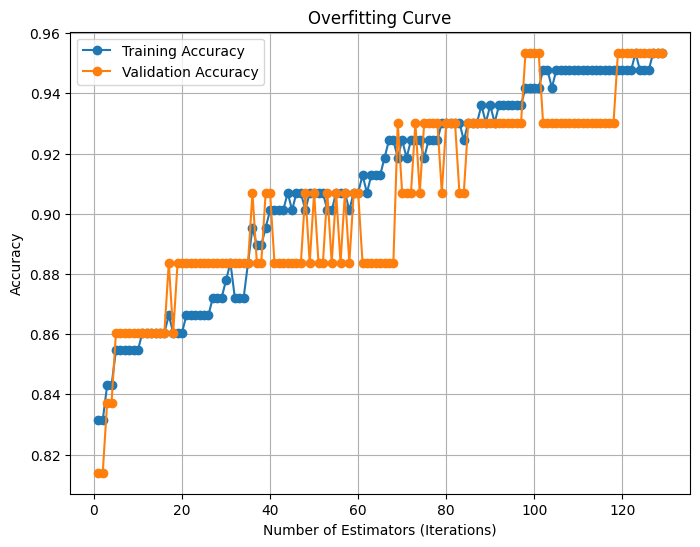

In [69]:
train_scores = []
test_scores = []

for i, y_pred in enumerate(best_clf.staged_predict(x_train)):
    train_accuracy = accuracy_score(y_train, y_pred)
    train_scores.append(train_accuracy)

test_scores = list(best_clf.staged_score(x_test, y_test))

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, n_iterations + 1), train_scores, marker='o', label='Training Accuracy')
plt.plot(np.arange(1, n_iterations + 1), test_scores, marker='o', label='Validation Accuracy')
plt.xlabel('Number of Estimators (Iterations)')
plt.ylabel('Accuracy')
plt.title('Overfitting Curve')
plt.legend()
plt.grid(True)
plt.show()


# Visualization of the feature importance scores

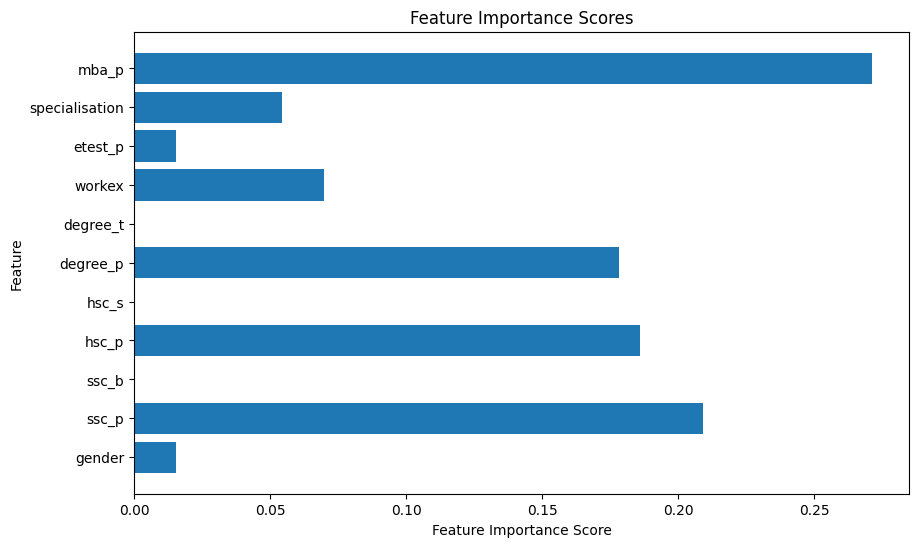

In [70]:
feat_importances = best_clf.feature_importances_

# Get feature names from your dataset
feat_names = list(X.columns)

# Create a bar chart to visualize feature importance scores
plt.figure(figsize=(10, 6))
plt.barh(range(len(feat_importances)), feat_importances, align='center')
plt.yticks(range(len(feat_importances)), feat_names)
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance Scores')
plt.show()

# Top N most important features along with their importance scores.

In [79]:
# Create a DataFrame to store feature names and their importance scores
feat_importance_df = pd.DataFrame({'Feature': feat_names, 'Importance': feat_importances})

# Sort the DataFrame by importance scores in descending order
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# Print the top N most important features
top_n = 11
print(f"Top {top_n} most important features:")
print(feat_importance_df.head(top_n))

Top 11 most important features:
           Feature  Importance
10           mba_p    0.271318
1            ssc_p    0.209302
3            hsc_p    0.186047
5         degree_p    0.178295
7           workex    0.069767
9   specialisation    0.054264
0           gender    0.015504
8          etest_p    0.015504
2            ssc_b    0.000000
4            hsc_s    0.000000
6         degree_t    0.000000


# Analysis of key areas for improvement based on the top features.

In [80]:
top_feat = (feat_importance_df.head(top_n))

# Analyze the insights
for feat, importance in zip(top_feat['Feature'], top_feat['Importance']):
    print(f"\nAnalyzing feature: {feat}")

    if importance > 0.05:  # You can adjust the threshold based on your needs
        print(f"{feat} has a positive impact on placement outcomes.")
        print("Higher values of", feat, "correlate with better placement outcomes.")

    elif importance < -0.05:  # You can adjust the threshold based on your needs
        print(f"{feat} has a negative impact on placement outcomes.")
        print("Higher values of", feat, "correlate with poorer placement outcomes.")

    else:
        print(f"{feat} has a relatively neutral impact on placement outcomes.")
        print(f"{feat} may not have a significant influence on placement outcomes.")




Analyzing feature: mba_p
mba_p has a positive impact on placement outcomes.
Higher values of mba_p correlate with better placement outcomes.

Analyzing feature: ssc_p
ssc_p has a positive impact on placement outcomes.
Higher values of ssc_p correlate with better placement outcomes.

Analyzing feature: hsc_p
hsc_p has a positive impact on placement outcomes.
Higher values of hsc_p correlate with better placement outcomes.

Analyzing feature: degree_p
degree_p has a positive impact on placement outcomes.
Higher values of degree_p correlate with better placement outcomes.

Analyzing feature: workex
workex has a positive impact on placement outcomes.
Higher values of workex correlate with better placement outcomes.

Analyzing feature: specialisation
specialisation has a positive impact on placement outcomes.
Higher values of specialisation correlate with better placement outcomes.

Analyzing feature: gender
gender has a relatively neutral impact on placement outcomes.
gender may not have 

# Interpretations based on the analysis of the feature importance scores

## Positive Impact Features:

Higher values in ssc_p, hsc_p, degree_p,workex,specialisation  and mba_p are associated with better placement outcomes.

Encouraging students to excel in these academic aspects, to seek work experience and giving guidance to students in selecting impactful specializations. can enhance their chances of successful placements.

##Relatively Neutral Impact Features:

 etest_p, hsc_s, gender, and ssc_b show neutral influence on placement outcomes.

While not strongly linked to placement success, these factors contribute to the overall student profile. Provided with good career guidance, internships, and inclusive campus activities can improve overall employability.





# Slection of the Model from both Ada Boost Classifier Model with Optuna and Gradient Boosting Classifier Model with Optuna

Given that both models have similar accuracy, classification report, and feature importance rankings, we can use any one of the both models based on personal preference.

But other than personal preference it was challenging for us to make a clear distinction between them. Therefore, in this scenario, we could consider the following factors to make our decision based on Interpretability, Robustness and Computational Efficiency.

In [73]:
print("Mean Accuracy (AdaBoost):", mean_accuracy_gb)
print("Training Time (AdaBoost):", ada_training_time, "seconds")
print("Mean Accuracy (Gradient Boosting):", mean_accuracy_gb)
print("Training Time (Gradient Boosting):", gb_training_time, "seconds")

Mean Accuracy (AdaBoost): 0.8425210084033614
Training Time (AdaBoost): 0.19284749031066895 seconds
Mean Accuracy (Gradient Boosting): 0.8425210084033614
Training Time (Gradient Boosting): 0.11720633506774902 seconds


### So after considering all these factors we decided to go with the AdaBoost Classifier for our task. It turns out that AdaBoost has a slightly higher accuracy when we put it through cross-validation. That means it's better at making predictions for our specific dataset. It still manages to train at a reasonable speed, so we're not sacrificing efficiency.

### Ada Boost also seems to be more interpretable. It has this ability to identify important features in a more balanced way, making it clearer to grasp how the model arrives at its decisions.and can handle larger datasets without breaking a sweat.

# Saving the decided model using Pickle

In [74]:
import pickle
pickle.dump(best_clf, open('model.pkl', 'wb'))